In [77]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
from PIL import Image


[0 0 0 1 0 0 0 0 0 0]


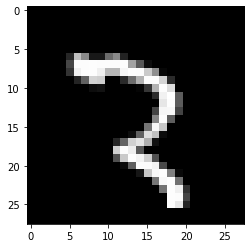

In [78]:
train_image_file_X = '/home/abhay/DL/MNIST/raw/train-images-idx3-ubyte'
train_image_file_Y = '/home/abhay/DL/MNIST/raw/train-labels-idx1-ubyte'
test_image_file_X = '/home/abhay/DL/MNIST/raw/t10k-images-idx3-ubyte'
test_image_file_Y = '/home/abhay/DL/MNIST/raw/t10k-labels-idx1-ubyte'
X_train = idx2numpy.convert_from_file(train_image_file_X)
Y_train = idx2numpy.convert_from_file(train_image_file_Y)[:,None].T
X_test = idx2numpy.convert_from_file(test_image_file_X)
Y_test = idx2numpy.convert_from_file(test_image_file_Y)[:,None].T

Y_train = np.repeat(Y_train,10,axis = 0)
j = np.arange(10)[:,None]
c = Y_train==j
Y_train=c.astype('uint8')

Y_test = np.repeat(Y_test,10,axis = 0)
j = np.arange(10)[:,None]
c = Y_test==j
Y_test=c.astype('uint8')

img = X_train[500]
plt.imshow(img,cmap ='gray')
print(Y_train[:,500])

In [79]:
X_train_flatten = X_train.reshape((X_train.shape[0],-1)).T
X_test_flatten = X_test.reshape((X_test.shape[0],-1)).T
print(X_train_flatten.shape,X_test_flatten.shape,Y_test.shape,Y_train.shape)
layers_dims = [784, 512, 256, 128, 10]

(784, 60000) (784, 10000) (10, 10000) (10, 60000)


In [80]:
X = X_train_flatten/255
test_X = X_test_flatten/255

In [81]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [82]:
def relu(z):
    return np.where(z > 0 , z , 0)

In [83]:
def gradient(z , activation = "relu"):
    if activation == "relu":
        g = np.where(z > 0 , 1 , 0)
    else:
        g = sigmoid(z) * (1 - sigmoid(z))
    return g

In [84]:
def initialize(layer_dims):
    parameters = {}
    
    for l in range(1,len(layer_dims)):
        #Xavier's initialization
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * np.sqrt(2/(layer_dims[l] + layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [85]:
def calculate_cost(A , Y):
    loss = -(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    m = Y.shape[1]
    cost= (1/m) * np.sum(loss)
    return(cost)

In [86]:
def forward_prop(X , parameters , layer_dims):
    #m = X.shape[1]
    cache = {}
    A = X
    cache["A0"] = X
    for i in range(1,len(layer_dims)):
        W = parameters['W' + str(i)]
        b = parameters['b' + str(i)]
        Z = np.dot(W , A) + b
        if i == len(layer_dims)-1:
            A = sigmoid(Z)
            
        else:
            A = relu(Z)
        cache['A' + str(i)] = A
        cache['Z' + str(i)] = Z
    
    return A,cache

In [87]:
def back_prop(X , Y , parameters , cache):
    m = X.shape[1]
    grad = {}
    L = len(parameters) // 2
    A_l = cache['A' + str(L)]
    dz = A_l - Y
    for i in range(L-1, -1, -1):
        A_l = cache['A' + str(i)]
        grad['dW' + str(i + 1)] = (1/m) * np.dot(dz , A_l.T)
        grad['db' + str(i + 1)] = (1/m) * np.sum(dz ,axis = 1 , keepdims = True)
        W = parameters['W' + str(i+1)]
        if i is not 0:
            z = cache['Z' + str(i)]
            if i == L - 1:
                dz_ = np.dot(W.T , dz) * gradient(z , activation = "sigmoid")
                dz = dz_
            else:
                dz_ = np.dot(W.T , dz) * gradient(z , activation = "relu")
                dz = dz_
        else:
            pass
    return grad

In [88]:
def predict_train(X ,parameters,Y , layers_dims):
    A,cache = forward_prop(X ,parameters , layers_dims)
    predict = np.where(A >=0.5 ,1,0)
    accuracy = np.mean(predict==Y)*100
    return predict,accuracy

In [102]:
def nn_model(X, Y, layers_dims, learning_rate, num_iterations):
    m = X.shape[1]
    parameters = {}
    cache = {}
    grads = {}
    costs = []
    cost = []
    accuracy = []
    parameters = initialize(layers_dims)
    for i in range(num_iterations):
        A , cache = forward_prop(X , parameters , layers_dims)
        cost = calculate_cost(A , Y)
        grads = back_prop(X , Y , parameters , cache)
        
        for l in range(1 , len(layers_dims)):
            parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
            parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]
        learning_rate = 0.995 * learning_rate
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 10 == 0:
            costs.append(cost)
            yhat,acc = predict_train(X , parameters,Y_train , layers_dims)
            accuracy.append(acc)
            print("Accuracy after",i,"Iterations is ",acc)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 7.212514
Accuracy after 0 Iterations is  88.61866666666667
Cost after iteration 10: 3.198963
Accuracy after 10 Iterations is  90.0
Cost after iteration 20: 3.037401
Accuracy after 20 Iterations is  90.0
Cost after iteration 30: 2.839522
Accuracy after 30 Iterations is  90.0
Cost after iteration 40: 2.606189
Accuracy after 40 Iterations is  90.00366666666667
Cost after iteration 50: 2.364230
Accuracy after 50 Iterations is  90.60216666666666
Cost after iteration 60: 2.144974
Accuracy after 60 Iterations is  91.85
Cost after iteration 70: 1.963629
Accuracy after 70 Iterations is  92.7195
Cost after iteration 80: 1.819404
Accuracy after 80 Iterations is  93.32383333333333
Cost after iteration 90: 1.704649
Accuracy after 90 Iterations is  93.83283333333333
Cost after iteration 100: 1.611740
Accuracy after 100 Iterations is  94.24566666666666
Cost after iteration 110: 1.534944
Accuracy after 110 Iterations is  94.56933333333333
Cost after iteration 120: 1.470341
Accu

Cost after iteration 980: 0.894237
Accuracy after 980 Iterations is  97.19433333333333
Cost after iteration 990: 0.894044
Accuracy after 990 Iterations is  97.19466666666666


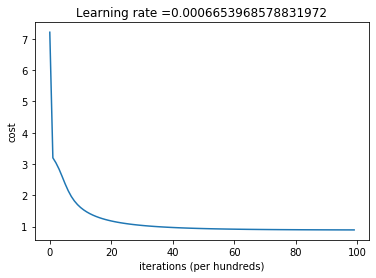

In [103]:
parameters = nn_model(X, Y_train, layers_dims , 0.1 , num_iterations = 1000)

In [334]:
Y,accuracy = predict_train(test_X ,parameters,Y_test , layers_dims)
print(Y[:,700],accuracy)
parameters0 = parameters
r = {}
W1 = parameters['W1']
W2 = parameters['W2']
W3 = parameters['W3']
W4 = parameters['W4']
b1 = parameters['b1']
b2 = parameters['b2']
b3 = parameters['b3']
b4 = parameters['b4']

np.save('W1.npy',W1)
np.save('W2.npy',W2)
np.save('W3.npy',W3)
np.save('W4.npy',W4)
np.save('b1.npy',b1)
np.save('b2.npy',b2)
np.save('b3.npy',b3)
np.save('b4.npy',b4)



W1 = np.load('/home/abhay/DL/MNIST/W1.npy')
W2 = np.load('/home/abhay/DL/MNIST/W2.npy')
W3 = np.load('/home/abhay/DL/MNIST/W3.npy')
W4 = np.load('/home/abhay/DL/MNIST/W4.npy')
b1 = np.load('/home/abhay/DL/MNIST/b1.npy')
b2 = np.load('/home/abhay/DL/MNIST/b2.npy')
b3 = np.load('/home/abhay/DL/MNIST/b3.npy')
b4 = np.load('/home/abhay/DL/MNIST/b4.npy')

r['W1'] = W1
r['b1'] = b1
r['W2'] = W2
r['b2'] = b2
r['W3'] = W3
r['b3'] = b3
r['W4'] = W4
r['b4'] = b4

[0 1 0 0 0 0 0 0 0 0] 97.316


(28, 28)
[0 1 0 0 0 0 0 0 0 0]


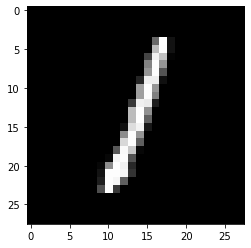

In [323]:
img = X_test[7000]
print(img.shape)
plt.imshow(img,cmap ='gray')
print(Y_test[:,7000])

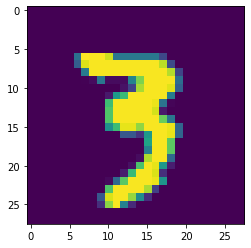

It is a :  3


In [324]:
index = 9501
#print()
x = X_test[index].reshape(784,1)
im = x.reshape(28,28)
plt.imshow(im)
plt.show()
A,cache = forward_prop(test_X[:,index].reshape(784,1) ,parameters , layers_dims)
predict = np.where(A >=0.5 ,1,0)
print("It is a : ",np.argmax(predict))

In [325]:
#def draw

In [326]:
import cv2
import numpy as np

In [327]:
def begueradj_draw(event,former_x,former_y,flags,param):
    global current_former_x,current_former_y,drawing, mode

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        current_former_x,current_former_y=former_x,former_y

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            if mode==True:
                cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),(255,255,255),90)
                current_former_x = former_x
                current_former_y = former_y
                #print former_x,former_y
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        if mode==True:
            cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),(255,255,255),90)
            current_former_x = former_x
            current_former_y = former_y
    return former_x,former_y    






In [328]:
im = np.zeros((512,512), np.uint8)
cv2.namedWindow('image')
drawing = False
mode = True
cv2.setMouseCallback('image',begueradj_draw)
while(1):
    cv2.imshow('image',im)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
cv2.destroyAllWindows()

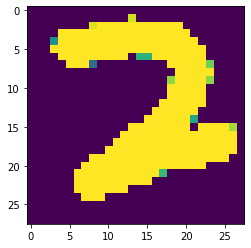

In [329]:

im_resize = cv2.resize(im,(28,28))
plt.imshow(im_resize)
plt.show()

In [330]:
im_reshape = im_resize.reshape((784,1))

In [331]:
print(im_reshape.shape)

(784, 1)


In [332]:
A,cache = forward_prop(im_reshape, parameters , layers_dims)
predict = np.where(A >=0.5 ,1,0)
print("It is a : ",np.argmax(predict))

It is a :  2
